![](airindia_sized.jpg)
<h1 align=center><font size=5>Air Fare</font></h1>

# 1. Initialize

## Getting Data

In [1]:
import pycaret

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('C:\\Users\\Raja\\Desktop\\project\\excelr\\air_fair.csv')

In [4]:
df = df.set_index(['InvoiceDate'])

In [5]:
df.head()

,NetFare,ProductType,ItineraryType
InvoiceDate,,,
1/12/18 11:43,2160.00,Other Product,Domestic
1/12/18 11:43,0.49,Other Product,Domestic
1/12/18 13:01,6550.00,Air,Domestic
1/12/18 13:10,6550.00,Air,Domestic
30/11/2018 14:30,5497.00,Air,Domestic


In [6]:
df.size

835398

In [7]:
df.ProductType.unique()

array(['Other Product', 'Air', 'Charge', 'Hotel', 'Air Cancellation',
       'Other Product Cancellation', 'payment', 'Hotel Cancellation',
       'refund', nan, 'Air Debit Note', 'Hotel Debit Note', 'Air Loss',
       'Other Product Debit Note', 'Hotel Loss'], dtype=object)

In [8]:
df.ItineraryType.unique()

array(['Domestic', nan, 'International'], dtype=object)

In [9]:
df.describe()

,NetFare
count,217576.000000
mean,4266.905212
std,9803.137297
min,-497324.000000
25%,10.000000
50%,3501.000000
75%,5944.000000
max,497678.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278466 entries, 1/12/18 11:43 to 10/6/19 22:30
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   NetFare        217576 non-null  float64
 1   ProductType    278464 non-null  object 
 2   ItineraryType  245689 non-null  object 
dtypes: float64(1), object(2)
memory usage: 8.5+ MB


<h4>Evaluating for Missing Data</h4>
The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:
<ol>
 <li><b>.isnull()</b></li>
 <li><b>.notnull()</b></li>
</ol>    
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [11]:
missing_data = df.isnull()

"True" stands for missing value, while "False" stands for not missing value.

<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset.  In the body of the for loop the method  ".value_counts()"  counts the number of "True" values. 
</p>

In [12]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

NetFare
False    217576
True      60890
Name: NetFare, dtype: int64

ProductType
False    278464
True          2
Name: ProductType, dtype: int64

ItineraryType
False    245689
True      32777
Name: ItineraryType, dtype: int64



Based on the summary above, each column has 278466 rows of data, three columns containing missing data:
<ol>
    <li>"NetFare": 60890 missing data</li>
<li>"ProductType": 2 missing data</li>
<li>"ItineraryType": 32777 missing data</li>
</ol>

<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>
<ul>
    <li>"NetFare": 60890 missing data, replace them with mean</li>
    <li>"ProductType": 2 missing data, replace them with most frequent occur</li>
    <li>"ItineraryType": 32777 missing data, replace them with most frequent occur</li>
</ul>

In [13]:
df.dtypes

NetFare          float64
ProductType       object
ItineraryType     object
dtype: object

Above data types has errors, actually NetFare is the float not object. So, it has to convert into float!

<h4>Calculate the average of the column </h4>

In [14]:
avg_NetFare = df.NetFare.astype("float").mean(axis=0)
print("Average of NetFare:", avg_NetFare)

Average of NetFare: 4266.905212109792


#### Replace "NaN" by mean value in "NetFare" column

In [15]:
import numpy as np

In [16]:
df["NetFare"].replace(np.nan, avg_NetFare, inplace=True)

In [17]:
df.NetFare.value_counts

<bound method IndexOpsMixin.value_counts of InvoiceDate
1/12/18 11:43       2160.00
1/12/18 11:43          0.49
1/12/18 13:01       6550.00
1/12/18 13:10       6550.00
30/11/2018 14:30    5497.00
                     ...   
10/6/19 20:45          0.00
10/6/19 21:39       9073.00
10/6/19 22:18       2367.00
10/6/19 22:30       6572.00
10/6/19 22:30       5118.00
Name: NetFare, Length: 278466, dtype: float64>

In [18]:
df.NetFare.isnull().sum()

0

## Working with ProductType

In [19]:
df['ProductType'].value_counts()

Air                           151995
payment                        55394
Charge                         32775
Other Product                  18692
Hotel                           7904
refund                          5495
Air Cancellation                4600
Other Product Cancellation       547
Air Debit Note                   535
Hotel Cancellation               289
Air Loss                         210
Other Product Debit Note          21
Hotel Loss                         4
Hotel Debit Note                   3
Name: ProductType, dtype: int64

ProductType of most frequent is Air, So replace with Air.

We can see that Air are the most common type. We can also use the ".idxmax()" method to calculate for us the most common type automatically:

In [20]:
df['ProductType'].value_counts().idxmax()

'Air'

The replacement procedure is very similar to what we have seen previously

In [21]:
#replace the missing 'Air values by the most frequent 
df["ProductType"].replace(np.nan, "Air", inplace=True)

In [22]:
df['ProductType'].value_counts()

Air                           151997
payment                        55394
Charge                         32775
Other Product                  18692
Hotel                           7904
refund                          5495
Air Cancellation                4600
Other Product Cancellation       547
Air Debit Note                   535
Hotel Cancellation               289
Air Loss                         210
Other Product Debit Note          21
Hotel Loss                         4
Hotel Debit Note                   3
Name: ProductType, dtype: int64

In [23]:
df.ProductType.isnull().sum()

0

### Working with ItineraryType

In [24]:
df['ItineraryType'].value_counts()

Domestic         225231
International     20458
Name: ItineraryType, dtype: int64

ItineraryType of most frequent is Domestic, So replace with Domestic.

We can see that Domestic are the most common type. We can also use the ".idxmax()" method to calculate for us the most common type automatically:

In [25]:
df['ItineraryType'].value_counts().idxmax()

'Domestic'

In [26]:
#replace the missing Domestic values by the most frequent 
df["ItineraryType"].replace(np.nan, "Domestic", inplace=True)

In [27]:
df['ItineraryType'].value_counts()

Domestic         258008
International     20458
Name: ItineraryType, dtype: int64

In [28]:
df.ItineraryType.isnull().sum()

0

In [29]:
missing_data_cleaned = df.isnull()

In [30]:
for column in missing_data_cleaned.columns.values.tolist():
    print(column)
    print (missing_data_cleaned[column].value_counts())
    print("")  

NetFare
False    278466
Name: NetFare, dtype: int64

ProductType
False    278466
Name: ProductType, dtype: int64

ItineraryType
False    278466
Name: ItineraryType, dtype: int64



<b>Good!</b> Now, we obtain the dataset with no missing values.

## Setting up Environment

In [31]:
from pycaret.regression import *
env= setup(data = df, target = 'NetFare')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,758
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(278466, 3)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# 2. Model Training

## Create Model

In [32]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.600980e+03,4.998092e+07,7.069718e+03,1.715000e-01,1.2343,8.259700e+00
1,2.669652e+03,6.463066e+07,8.039320e+03,1.534000e-01,1.5714,7.978400e+00
2,2.681154e+03,1.081726e+08,1.040061e+04,1.091000e-01,1.7479,8.710700e+00
3,2.662184e+03,6.961721e+07,8.343693e+03,1.642000e-01,1.6194,8.097500e+00
4,2.600027e+03,5.476869e+07,7.400587e+03,1.858000e-01,1.4950,8.973900e+00
5,2.704132e+03,8.422390e+07,9.177358e+03,1.116000e-01,1.3442,9.651700e+00
6,2.559372e+03,5.242988e+07,7.240848e+03,1.875000e-01,1.5174,8.494000e+00
7,2.630679e+03,5.723088e+07,7.565109e+03,1.849000e-01,1.6044,1.015140e+01
8,4.551757e+09,2.826828e+23,5.316792e+11,-4.280581e+15,1.3323,-1.391845e+06
9,2.741327e+03,9.399814e+07,9.695264e+03,1.093000e-01,1.5320,9.859300e+00


In [34]:
ridge=create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2607.1427,4.998407e+07,7069.9414,0.1714,1.2121,8.4484
1,2666.8548,6.463306e+07,8039.4691,0.1534,1.2266,7.9081
2,2673.3019,1.081696e+08,10400.4594,0.1091,1.2604,8.6018
3,2663.5381,6.961599e+07,8343.6199,0.1642,1.2475,8.1878
4,2596.0216,5.476855e+07,7400.5775,0.1858,1.2850,8.9275
5,2702.2322,8.422325e+07,9177.3226,0.1116,1.2443,9.6409
6,2554.6932,5.242869e+07,7240.7659,0.1875,1.2502,8.4401
7,2626.2074,5.723161e+07,7565.1575,0.1849,1.2837,10.0951
8,2631.8280,5.415904e+07,7359.2827,0.1799,1.2319,9.3235
9,2735.3036,9.399570e+07,9695.1380,0.1093,1.2873,9.7961


In [35]:
lar=create_model('lar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2607.2476,4.998355e+07,7069.9048,0.1714,1.2120,8.4495
1,2666.9469,6.463212e+07,8039.4104,0.1534,1.2265,7.9092
2,2673.4337,1.081702e+08,10400.4905,0.1091,1.2604,8.5964
3,2663.6237,6.961561e+07,8343.5967,0.1642,1.2474,8.1889
4,2596.1116,5.476839e+07,7400.5669,0.1858,1.2849,8.9286
5,2702.2819,8.422355e+07,9177.3387,0.1116,1.2449,9.6421
6,2554.8787,5.242986e+07,7240.8465,0.1875,1.2502,8.4414
7,2626.3010,5.723205e+07,7565.1865,0.1849,1.2829,10.0965
8,2632.2793,5.416173e+07,7359.4657,0.1798,1.2318,9.3248
9,2735.4742,9.399628e+07,9695.1679,0.1093,1.2873,9.7975


# 3. Tune Model

In [36]:
tuned_lr = tune_model('lr')
tuned_lr

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2607.2476,4.998355e+07,7069.9048,0.1714,1.2120,8.4495
1,2666.9469,6.463212e+07,8039.4104,0.1534,1.2265,7.9092
2,2673.4337,1.081702e+08,10400.4905,0.1091,1.2604,8.5964
3,2663.6237,6.961561e+07,8343.5967,0.1642,1.2474,8.1889
4,2596.1116,5.476839e+07,7400.5669,0.1858,1.2849,8.9286
5,2702.2819,8.422355e+07,9177.3387,0.1116,1.2449,9.6421
6,2554.8787,5.242986e+07,7240.8465,0.1875,1.2502,8.4414
7,2626.3010,5.723205e+07,7565.1865,0.1849,1.2829,10.0965
8,2632.1225,5.415984e+07,7359.3367,0.1799,1.2318,9.3248
9,2735.4742,9.399628e+07,9695.1679,0.1093,1.2873,9.7975


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [37]:
tuned_ridge = tune_model('ridge')
tuned_ridge

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2607.1585,4.998400e+07,7069.9361,0.1714,1.2120,8.4486
1,2666.8686,6.463292e+07,8039.4605,0.1534,1.2266,7.9083
2,2673.3215,1.081696e+08,10400.4638,0.1091,1.2604,8.6010
3,2663.5510,6.961594e+07,8343.6164,0.1642,1.2475,8.1880
4,2596.0353,5.476853e+07,7400.5761,0.1858,1.2850,8.9277
5,2702.2410,8.422329e+07,9177.3250,0.1116,1.2443,9.6411
6,2554.7203,5.242886e+07,7240.7773,0.1875,1.2502,8.4403
7,2626.2216,5.723167e+07,7565.1614,0.1849,1.2836,10.0953
8,2631.8495,5.415898e+07,7359.2788,0.1799,1.2319,9.3237
9,2735.3278,9.399577e+07,9695.1417,0.1093,1.2872,9.7963


Ridge(alpha=0.854, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=758, solver='auto', tol=0.001)

In [38]:
tuned_lar = tune_model('lar')
tuned_lar

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2607.2476,4.998355e+07,7069.9048,0.1714,1.2120,8.4495
1,2666.9469,6.463212e+07,8039.4104,0.1534,1.2265,7.9092
2,2673.4337,1.081702e+08,10400.4905,0.1091,1.2604,8.5964
3,2663.6237,6.961561e+07,8343.5967,0.1642,1.2474,8.1889
4,2596.1116,5.476839e+07,7400.5669,0.1858,1.2849,8.9286
5,2702.2819,8.422355e+07,9177.3387,0.1116,1.2449,9.6421
6,2554.8787,5.242986e+07,7240.8465,0.1875,1.2502,8.4414
7,2626.3010,5.723205e+07,7565.1865,0.1849,1.2829,10.0965
8,2632.2793,5.416173e+07,7359.4657,0.1798,1.2318,9.3248
9,2735.4742,9.399628e+07,9695.1679,0.1093,1.2873,9.7975


Lars(copy_X=True, eps=0.001, fit_intercept=True, fit_path=True,
     n_nonzero_coefs=500, normalize=True, precompute='auto', verbose=False)

# 4. Model Ensembling

## Blend Models

In [39]:
blender = blend_models(estimator_list = [lr, ridge, lar])
blender

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.605118e+03,4.998279e+07,7.069851e+03,1.714000e-01,1.2147,8.3859
1,2.667815e+03,6.463190e+07,8.039397e+03,1.534000e-01,1.3861,7.9319
2,2.675958e+03,1.081707e+08,1.040051e+04,1.091000e-01,1.5225,8.6363
3,2.663108e+03,6.961623e+07,8.343634e+03,1.642000e-01,1.4243,8.1581
4,2.597386e+03,5.476852e+07,7.400576e+03,1.858000e-01,1.3637,8.9434
5,2.702882e+03,8.422356e+07,9.177339e+03,1.116000e-01,1.2718,9.6449
6,2.556314e+03,5.242946e+07,7.240819e+03,1.875000e-01,1.3596,8.4585
7,2.627706e+03,5.723148e+07,7.565149e+03,1.849000e-01,1.4271,10.1143
8,1.517254e+09,3.140920e+22,1.772264e+11,-4.756202e+14,1.2686,-463942.0406
9,2.737367e+03,9.399667e+07,9.695188e+03,1.093000e-01,1.3836,9.8176


VotingRegressor(estimators=[('Linear Regression_0',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('Ridge_1',
                             Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=758, solver='auto',
                                   tol=0.001)),
                            ('Least Angle Regression_2',
                             Lars(copy_X=True, eps=2.220446049250313e-16,
                                  fit_intercept=True, fit_path=True,
                                  n_nonzero_coefs=500, normalize=True,
                                  precompute='auto', verbose=False))],
                n_jobs=None, weights=None)

# 5. Model Analysis

## Plot Model

Before model finalization, the plot_model() function can be used to analyze the performance across different aspects such as Residuals Plot, Prediction Error, Feature Importance etc. This function takes a trained model object and returns a plot based on the test / hold-out set.

There are over 10 plots available, please see the plot_model() docstring for the list of available plots.

### 5.1 Residual Plot

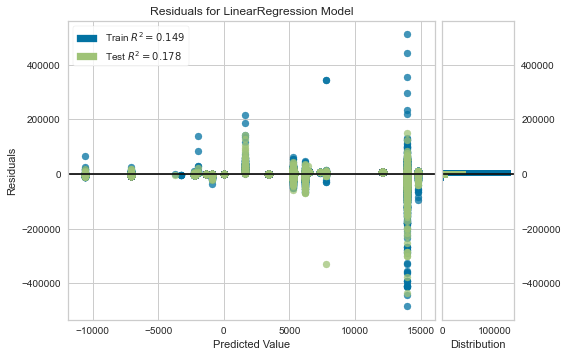

In [40]:
plot_model(tuned_lr)

### 5.2 Recursive Feat. Selection

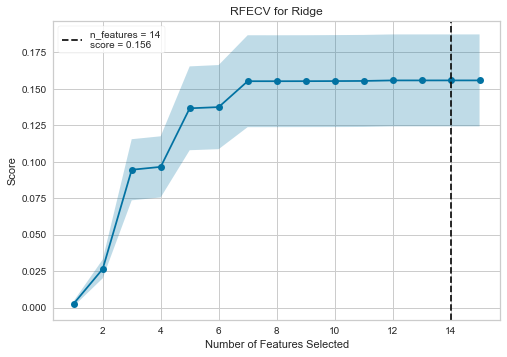

In [41]:
plot_model(tuned_ridge, plot='rfe')

### 5.3 Prediction Error Plot

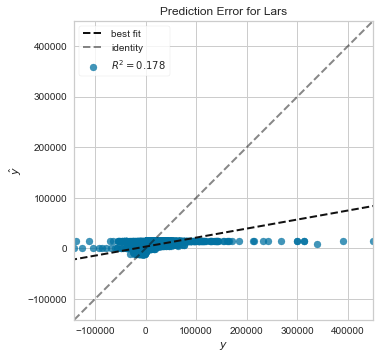

In [42]:
plot_model(tuned_lar, plot = 'error')

### 5.4 Feature Importance Plot

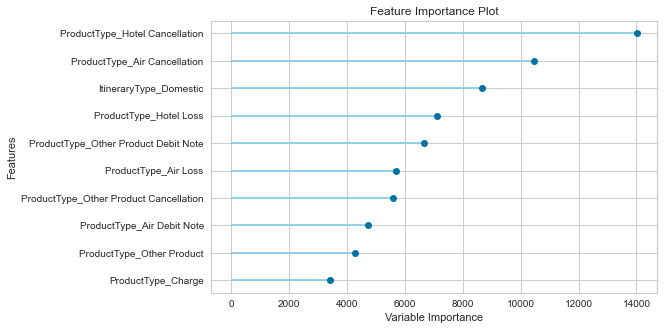

In [43]:
plot_model(tuned_lar, plot = 'feature')

there was error in 6/6/2019 18:08